In [1]:
import os
import time
import datetime as dt
import pandas as pd
from IPython.display import display, clear_output
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
primary_dir = "/Volumes/Seagate Backup Plus Drive/Miscellaneous/Google Drive/"
df_file = "/Users/CollinHeist/Documents/GitHub/Personal-Projects/Duplicate Picture Identifier/history.csv"
valid_ext = ('.mov', '.mp4', '.gif', '.jpg', '.jpeg', '.png', '.heic')
count_freq_min = 2 # How often - in minutes - to check file counts

In [3]:
def get_file_count(path):
    try:
        return len([file for file in os.listdir(path) if file.lower().endswith(valid_ext)])
    except FileNotFoundError:
        return 0

In [4]:
def get_folder_list(path):
    list_of_files = os.listdir(path) # Get a list of all files in the current directory
    all_folders = []
    # Iterate over all the entries
    for entry in list_of_files:
        # Create full path
        full_path = os.path.join(path, entry)
        # If entry is a directory then get the list of files in this directory 
        # Ignore all hidden files, and the /temp/ folder and alias Duplicates subfolder used for dupe identification
        if os.path.isdir(full_path) and entry[0] is not '.' and entry is not 'temp' and entry != 'Duplicates':
            all_folders = all_folders + get_folder_list(full_path)
            all_folders.append(full_path)
                            
    return all_folders

In [8]:
try:
    df = pd.read_csv(df_file, index_col=0)
except FileNotFoundError:
    folder_list = get_folder_list(primary_dir)
    file_count = [get_file_count(folder) for folder in folder_list]
    df = pd.DataFrame([file_count], index=[last_time],
                      columns=[folder[len(primary_dir):] for folder in folder_list])
    df.to_csv(df_file)
    
while True:
    # Get folder list and file count of base folder
    folder_list = get_folder_list(primary_dir)
    file_count = [get_file_count(folder) for folder in folder_list]
    # Generate a new row that contains all the subolders and their corresponding file counts
    new_row = pd.Series(dict(zip([folder[len(primary_dir):] for folder in folder_list], file_count)), name=dt.datetime.now())
    # Append the row to the existing DataFrame, delete duplicate rows where counts don't change, replace NaN w/ 0
    df = df.append(new_row).drop_duplicates(keep='last').fillna(0)
    # Write the updated DataFrame to the DataFrame file
    df.to_csv(df_file)
    # Display DataFrame
    with pd.option_context('display.max_rows', 10, 'display.max_columns', 500, 'display.max_colwidth', 10000):
        clear_output()
        display(df)
    # Wait between parsing file contents
    time.sleep(count_freq_min * 60.0)

,Google Photos/2018,Google Photos/2019,Known,Named/-Comics,Named/-Famous/Alexandra Daddario,Named/-Famous/Allison Brie,Named/-Famous/Allison Parker,Named/-Famous/Anna Kendrick,Named/-Famous/Ariana Grande,Named/-Famous/Ariel Winter,Named/-Famous/Brie Larson,Named/-Famous/Chloe Bennett,Named/-Famous/Christina Hendricks,Named/-Famous/Hayley Atwell,Named/-Famous/Kat Dennings,Named/-Famous/Kate Upton,Named/-Famous/Katy Perry,Named/-Famous/Lia Marie Johnson,Named/-Famous/Milana Vayntrub,Named/-Famous/Scarlet Johannsen,Named/-Famous/TV Shows,Named/-Famous,Named/:u:JustSomeGirlIDK/Videos,Named/:u:JustSomeGirlIDK,Named/AJ Etherington,Named/Abbey & Emmy Runge,Named/Abby Craun,Named/Abigail Smith,Named/Acey Norris,Named/Alahna Ly/Videos,Named/Alahna Ly,Named/Alana Merrick/Videos,Named/Alana Merrick,Named/Alice (@pineapplebrat),Named/Alison Huber,Named/Ally Carter,Named/Alyssa Dawidziak,Named/Amber Webb,Named/Amouranth,Named/Angelina Guercio,Named/Angie Verona,Named/Anna Faith/Videos,Named/Anna Faith,Named/Autumn VW,Named/Bailey Anne Hector (AskFM),Named/Bella Hobbins,Named/Bella Simpson,Named/Bethany Crocker,Named/Blanc Noir,Named/Breanna Knight,Named/Breelyn Rogers,Named/Brittany Wright (AskFM),Named/Brooke Hardiman,Named/Camille (AskFM),Named/Caranara,Named/Carlie Purdom,Named/Carolyn & Samantha Auf,Named/Chloe Daletski,Named/Chloe Lamela,Named/Claire Abbott,Named/Coffey Sisters,Named/Corie Vanorder,Named/Dari Smith/Videos,Named/Dari Smith,Named/Derrion Keller,Named/Dulce Dasha,Named/Elizabeth M,Named/Elizabeth Zaks,Named/Ella & Georgia Wilkins,Named/Elle Cook,Named/Ellen Dimacchia/Videos,Named/Ellen Dimacchia,Named/Ellie Rose Thompson,Named/Elsie Hewitt,Named/Emily Wellington,Named/Emma Burzynskii,Named/Emma Marie Snider,Named/Erin Ashford,Named/Evalina Diordiev,Named/Fallon Keefe,Named/Faren Eisele (AskFM),Named/Genevieve Adams,Named/Giana Mello,Named/Gigi Milano,Named/Hannah Claire,Named/Hannah Guerra,Named/Hannah Woods/Videos,Named/Hannah Woods,Named/Hope (AskFM),Named/Ines Kubat,Named/Jade (AskFM),Named/Jade Grobler,Named/Jade Snel,Named/Jaden & Alexa Nako,Named/Jasmine Peardon,Named/Jem Wolfie,Named/Jerusa Lamoureux (AskFM),Named/Jessica (AskFM),Named/Jessica Gonzales,Named/Jessica Le,Named/Johanna Kuehne,Named/Josi Stillman (AskFM),Named/Kaelie/Videos,Named/Kaelie,Named/Kallie Booth,Named/Kallie Marie,Named/Karisa Salmon,Named/Kassidy Leatham/Videos,Named/Kassidy Leatham,Named/Kate Pekuri,Named/Kay Marie,Named/Kaya (AskFM),Named/Kayla Wilde,Named/Kendra Hewitt,Named/Kendra Noneman,Named/Kendra Rowe,Named/Kiara Jade Taylor,Named/Kirsi Casper,Named/Laura LaPerriere,Named/Laura Marie/Videos,Named/Laura Marie,Named/Lauren Nichole,Named/Lesly Arellano,Named/Lila Joelle,Named/Lily-Ana Alexander,Named/Maddi,Named/Maddie Hodder,Named/Madison Alexis,Named/Madison Ginley/Videos,Named/Madison Ginley,Named/Madison Pons,Named/Maggie (omgcosplay),Named/Maggie Smokzynski,Named/Marina/Videos,Named/Marina,Named/Martina Cancelo,Named/Mati/Videos,Named/Mati,Named/Meaca (AskFM),Named/Meredith Spelbring/Videos,Named/Meredith Spelbring,Named/Mini Jello,Named/Mira Park (AskFM),Named/Mykle Peters,Named/Nayara Macedo,Named/Nicky Gile,Named/Olivia Kelley,Named/Olivia Raymond,Named/Paige Jerue,Named/Paige Tilley,Named/Penny Matthews,Named/Peyton Harper,Named/Queen Pozo (@queen.pozo),Named/Rachel Renee Anderson (@rachelandersxn),Named/Rebecca Catherine Smith,Named/Roseanna,Named/Ruby May,Named/Sabrina Z/Videos,Named/Sabrina Z,Named/Sadarah Curtis,Named/Saija/Videos,Named/Saija,Named/Samantha Jozwik,Named/Sarah Sluggett,Named/Savannah Belle/Videos,Named/Savannah Belle,Named/Savannah Wallace/Videos,Named/Savannah Wallace,Named/Skyler Schuler/Videos,Named/Skyler Schuler,Named/Sofia Bevarly,Named/Sophi Knight,Named/Sophia Diamond/Videos,Named/Sophia Diamond,Named/Sophie Mudd,Named/Steph Valruggo,Named/Taryn Collimore/Videos,Named/Taryn Collimore,Named/Taylor Alesia/Videos,Named/Taylor Alesia,Named/Taylor Colton,Named/Taylor Dawn,Named/Taylor Flewin,Named/Taylo

KeyboardInterrupt: 

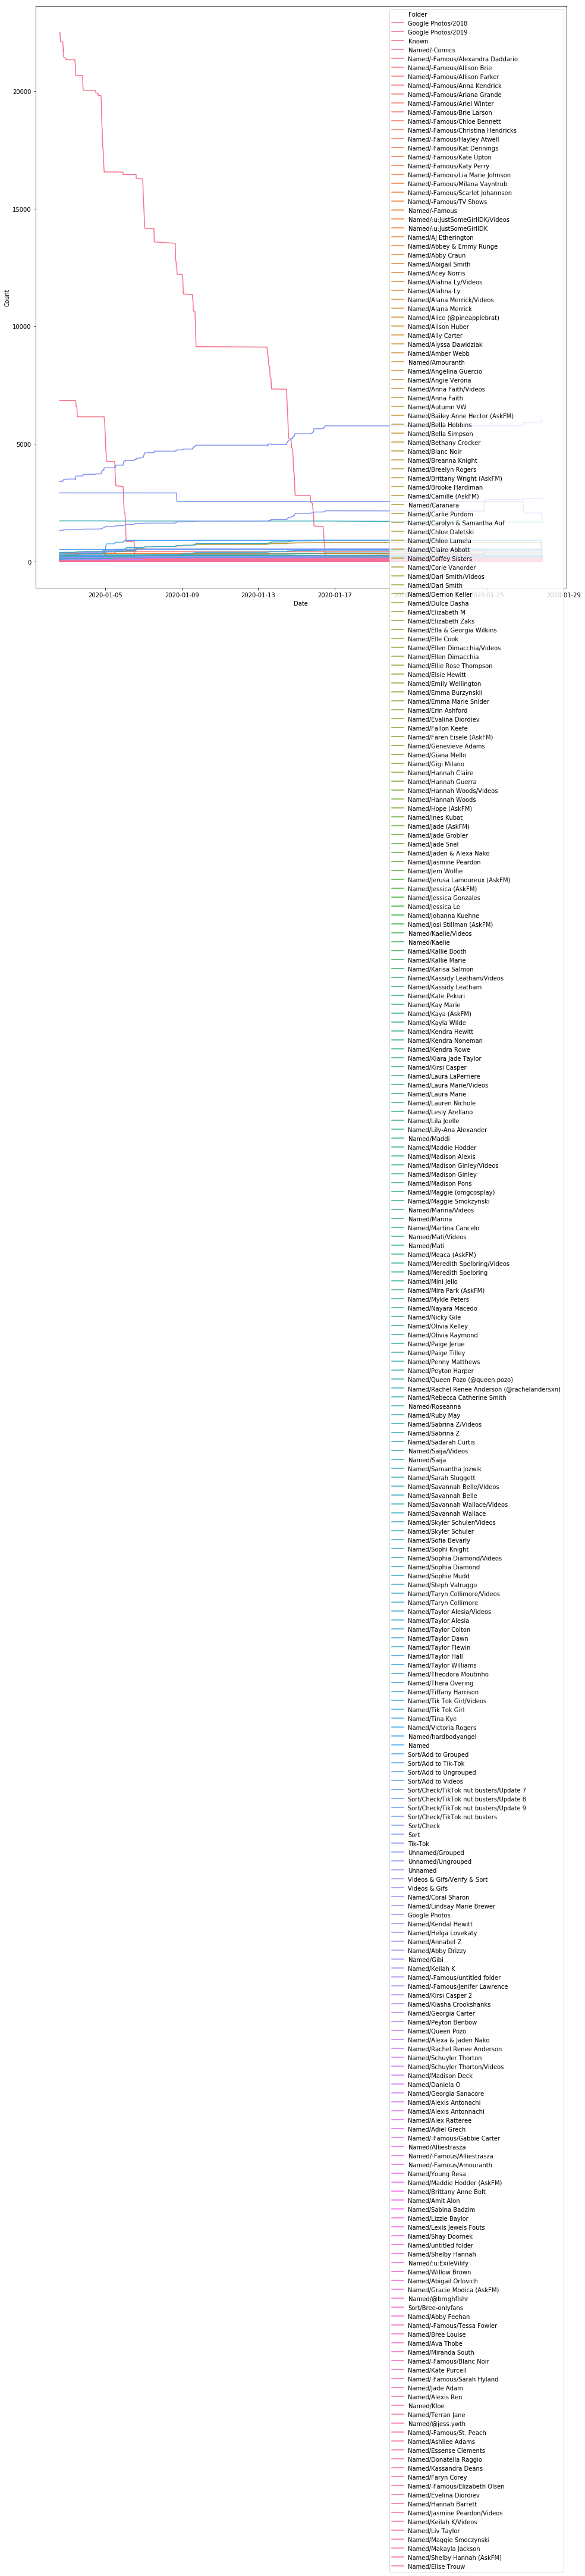

In [6]:
# filt_df = df[df.columns[(df.max() < 250) & (df.max() > 25)]]
filt_df = df
plot_df = filt_df.unstack().reset_index()
plot_df.columns = ['Folder', 'Date', 'Count']
plot_df['Date'] = pd.to_datetime(plot_df['Date'])

plt.figure(figsize=(16, 18))
g = sns.lineplot(x='Date', y='Count', hue='Folder', data=plot_df)
# g.set(ylim=(0, 275))